In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

style_name = 'bmh' #bmh

mpl.style.use(style_name)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 패턴인식과 머신러닝 부록 D 정리

<p style="text-align: right;">2021.03.15 조준우 metamath@gmail.com</p>

## 변분법Calculus of variations<sup>[1]</sup>

패턴인식과 머신러닝(Pattern Recognition and Machine Learning, PRML)<sup>[2]</sup> 식(1.88)에 변분법을 적용하는 내용이 나오는데 변분법에 대해 간략하게 부록 D로 정리할 뿐 별다른 설명이 없어 본 글을 적게되었다. 이 글에서는 PRML에서 식 D.8까지 내용이 정리되어 있다. 


### 표기법

- 표기를 간단히 하기 위해 $\frac{dy}{dx}$를 편의상 $\dot y$로 표기한다. 
- 이 글과 PRML 부록 D에서 표기법이 약간 다른데 다음과 같다.

| PRML | 이 글 에서|
|---|:---:|
| $F$ | $J$ |
| $G$ | $f$ |  


변분법이란 적분형 범함수의 최적화로 다음과 같이 정의된 범함수를 최소화 시키는 함수 $y^*(x)$를 찾는 방법이다.  



$$
\text{Min.} \quad J[y] = \int_{x_0}^{x_1} f(x, y, \dot y) dx
$$

위 문제에 대한 $y(x)$로써 허용될 수 있는 함수의 클래스(class of admissible function)는 두번 미분이 연속인 $C^2$로 제한한다. 따라서 앞으로 유도될 필요조건은 로컬 미니멈에 대한 조건이 된다. 왜냐하면 $J[y(x)]$를 더 최소화 시키는 $C^1$또는 불연속 함수가 있을 수 있기 때문이다.

$y^*(x)$에서 주어진 범함수의 작은 변화<sup>variation</sup>는 경계조건을 만족하는 임의의 함수 $\eta(x)$와 충분히 작은수 $\epsilon$에 대해

$$
\begin{aligned}
\Delta J &= J\left[y^*(x) + \epsilon \eta(x) \right] - J \left[ y^*(x) \right] \\[10pt]
&= \int_{x_0}^{x_1} f \left(x, y^*(x) + \epsilon \eta(x), \dot y^*(x) + \epsilon \dot \eta(x) \right) dx
- \int_{x_0}^{x_1} f \left( x, y^*(x), \dot y^*(x)  \right) dx
\end{aligned} \tag{*}
$$

이다. 여기서 경계조건이라 함은 $\eta(x_0) = \eta(x_1) = 0$으로써 $y^*(x)$와 $y^*(x) + \epsilon \eta(x)$의 양 끝점은 동일하게 된다. 그리고 $y^*(x)$가 $J$를 최소화 한다면 모든 임의의 $\eta(x)$에 대해서 $\Delta J \ge 0$ 이어야 한다. 첫항 $ f \left(x, y^*(x) + \epsilon \eta(x), \dot y^*(x) + \epsilon \dot \eta(x) \right) $를 테일러 시리즈 전개하면 (편미분 분자의 $f$는 $f\left( x, y^*(x), \dot y^*(x)  \right)$를 간단히 표시한 것)

$$
\begin{aligned}
&f \left(x, y^*(x) + \epsilon \eta(x), \dot y^*(x) + \epsilon \dot \eta(x) \right) \\[10pt] 
=& f \left( x, y^*(x), \dot y^*(x)  \right) + \frac{\partial \, f}{\partial \, y(x)} \epsilon \eta(x) + \frac{\partial \, f}{\partial \, \dot y(x)} \epsilon \dot \eta(x) \\[10pt]
& + \frac{1}{2} \frac{\partial^2 \, f}{\partial \, y^2(x)} \epsilon^2 \eta^2(x) + \frac{1}{2} \frac{\partial^2 \, f}{\partial \, y(x) \dot y(x)} \epsilon^2 \eta(x) \dot \eta(x) + \frac{1}{2} \frac{\partial^2 \, f}{\partial \,  \dot y(x) y(x)} \epsilon^2  \dot \eta(x) \eta(x) + \frac{1}{2} \frac{\partial^2 \, f}{\partial \, \dot y^2(x)} \epsilon^2 \dot \eta^2(x) + O(\epsilon^3)  \\[10pt]
=& f \left( x, y^*(x), \dot y^*(x)  \right) + \epsilon \left[ \frac{\partial \, f}{\partial \, y(x)}  \eta(x) + \frac{\partial \, f}{\partial \, \dot y(x)} \dot \eta(x) \right] \\[10pt]
& + \epsilon^2 \frac{1}{2} \left[ \frac{\partial^2 \, f}{\partial \, y^2(x)}  \eta^2(x) + 2 \frac{\partial^2 \, f}{\partial \, y(x) \dot y(x)} \eta(x) \dot \eta(x) + \frac{\partial^2 \, f}{\partial \, \dot y^2(x)}  \dot \eta^2(x)\right] + O(\epsilon^3)
\end{aligned}
$$

전개한 결과를 (*)에 대입

$$
\begin{aligned}
\Delta J = & \quad \int_{x_0}^{x_1} f \left( x, y^*(x), \dot y^*(x)  \right) dx + \epsilon \color{RoyalBlue}{ \int_{x_0}^{x_1} \left[ \frac{\partial \, f}{\partial \, y(x)}  \eta(x) + \frac{\partial \, f}{\partial \, \dot y(x)} \dot \eta(x) \right] dx} \\[10pt]
&+ \epsilon^2 \color{OrangeRed}{ \frac{1}{2} \int_{x_0}^{x_1}  \left[ \frac{\partial^2 \, f}{\partial \, y^2(x)}  \eta^2(x) + 2 \frac{\partial^2 \, f}{\partial \, y(x) \dot y(x)} \eta(x) \dot \eta(x) + \frac{\partial^2 \, f}{\partial \, \dot y^2(x)}  \dot \eta^2(x)\right]dx} + O(\epsilon^3) \\[10pt]
&- \int_{x_0}^{x_1} f \left( x, y^*(x), \dot y^*(x)  \right) dx
\end{aligned}
$$

정리하면

$$
\begin{aligned}
\Delta J &= \epsilon \color{RoyalBlue}{ \int_{x_0}^{x_1} \left[ \frac{\partial \, f}{\partial \, y(x)}  \eta(x) + \frac{\partial \, f}{\partial \, \dot y(x)} \dot \eta(x) \right] dx} \\[10pt]
&+ \epsilon^2 \color{OrangeRed}{ \frac{1}{2} \int_{x_0}^{x_1}  \left[ \frac{\partial^2 \, f}{\partial \, y^2(x)}  \eta^2(x) + 2 \frac{\partial^2 \, f}{\partial \, y(x) \dot y(x)} \eta(x) \dot \eta(x) + \frac{\partial^2 \, f}{\partial \, \dot y^2(x)}  \dot \eta^2(x)\right]dx} + O(\epsilon^3) \\[10pt]
&= \epsilon \color{RoyalBlue}{V_1} + \epsilon^2 \color{OrangeRed}{ V_2} + O(\epsilon^3)
\end{aligned}
$$

여기서 $\epsilon$의 부호에 상관없이 $\Delta J \ge 0$를 보장하려면 적어도 $V_1 = 0$으로 첫째항은 사라져야 한다. $V_1$을 적분해보면, (표기를 간단히 하기위해 $y(x)$, $\eta(x)$를 $y$, $\eta$로 표시)

$$
\int_{x_0}^{x_1} \left[\eta \frac{\partial \, f}{\partial \, y}   +  \dot \eta \frac{\partial \, f}{\partial \, \dot y} \right] dx = \int_{x_0}^{x_1} \eta \frac{\partial \, f}{\partial \, y} dx + \color{RoyalBlue}{ \int_{x_0}^{x_1}  \dot \eta \frac{\partial \, f}{\partial \, \dot y} dx} \tag{**}
$$

파란색 부분을 부분적분하면

$$
\color{RoyalBlue}{ \int_{x_0}^{x_1}  \dot \eta \frac{\partial \, f}{\partial \, \dot y} dx} = \left[ \eta \frac{\partial \, f}{\partial \, \dot y} \right]_{x_0}^{x_1} - \int_{x_0}^{x_1} \eta \frac{d}{dx} \left( \frac{\partial \, f}{\partial \, \dot y} \right) dx
$$

우변의 첫째항은 경계조건에 의해 $\eta(x_0) = \eta(x_1) = 0$이므로 사라지고 두번째항을 $(**)$에 대입하고 다시 쓰면

$$
V_1= \int_{x_0}^{x_1} \eta \frac{\partial \, f}{\partial \, y} - \eta \frac{d}{dx} \left( \frac{\partial \, f}{\partial \, \dot y} \right)  dx = \int_{x_0}^{x_1} \eta \left\{ \frac{\partial \, f}{\partial \, y} -  \frac{d}{dx} \left( \frac{\partial \, f}{\partial \, \dot y} \right) \right\} dx
$$

적분 결과를 $\Delta J$에 대입하면

$$
\Delta J = \epsilon \color{RoyalBlue}{\int_{x_0}^{x_1} \eta \underbrace{\left\{ \frac{\partial \, f}{\partial \, y} -  \frac{d}{dx} \left( \frac{\partial \, f}{\partial \, \dot y} \right) \right\}}_{g(x)} dx} + \epsilon^2 \color{OrangeRed}{ V_2} + O(\epsilon^3) \tag{***}
$$

{ } 내부 함수를 $g(x)$라 하면 $y \in C^2$로 가정했고 $g(x)$는 $y$가 $x$에 대해 2번 미분되어 있어서 연속함수이다. 여기서 $\Delta J \ge 0$를 보장하기 위해 

$$
V_1 =  \color{RoyalBlue}{\int_{x_0}^{x_1} \eta(x) g(x) dx} = 0
$$

이어야 하는데 이를 위해서 $g(x) = 0$이면 된다. 만약 $g(x) \ne 0$이어서 $c \in [x_0, x_1]$인 $c$에 대해 $g(c)>0$이라고 하면 $g(x)$는 연속함수이므로 $c$ 근방 $\alpha < c < \beta$인 $[\alpha, \beta]$에서 역시 양수가 된다. 이제 $\eta(x)$를 $[\alpha, \beta]$에서 양수가 되게 잡으면 

$$
\color{RoyalBlue}{\int_{x_0}^{x_1} \eta(x) g(x) dx} \ge 0
$$

가 된다. 하지만 $y^*(x)$가 minimizer라면 모든 경계조건을 만족하는 연속함수 $\eta(x)$에 대해서 $V_1=0$이어야 하므로 결국 $g(x)=0$이 되어야 한다. 따라서 

$$
\frac{\partial \, f}{\partial \, y} -  \frac{d}{dx} \left( \frac{\partial \, f}{\partial \, \dot y} \right) = 0
$$

가 되며 이것이 범함수 최소화의 1계 필요조건<sup>first order necessary condition</sup>이 되고 오일러-라그랑지 방정식<sup>Euler–Lagrange equation</sup>이라 한다. 만약 $g(x)$가 연속이 아니면 $g(x)=0$을 보장할 수 없다. 왜냐하면 $g(x)$가 연속이 아니면 $c \in [x_0, x_1]$인 $c$에 대해 $g(c)>0$이고 나미지 $x$에 대해서는 모두 0인 함수를 생각해 볼 수 있는데 이 경우 $g(x)$가 양수값을 가지는 $c$ 포인트에서 점아래는 면적이 없으므로 임의의 $\eta(x)$에 대해 $\int_{x_0}^{x_1} \eta(x) g(x) dx=0$를 만족시키기 때문이다.

한편 범함수 $J$의 $y(x)$에 대한 미분을 생각해보기 위해 다변수 함수의 테일러시리즈 전개를 생각해본다. 제일 간단한 2변수 경우 $f(x^*_1, x^*_2)$ 근방에서 테일러 시리즈를 적어보면

$$
f(x^*_1 + d_1, x^*_2 + d_2) = f(x^*_1, x^*_2) + \underbrace{\sum_{i=1}^{2} \frac{\partial f}{\partial x_1} d_i + \frac{1}{2} \sum_{i=1}^{2}\sum_{j=1}^{2} \frac{\partial^2 f}{\partial x_i \partial x_j} d_i d_j + O(d^3)}_{\Delta f}
$$

여기서 $d_i = x_i - x^*_i$이다. 다변수 함수인 경우 $\Delta f$에서 각 변수마다 미분된 항에 작은 변량 $d_i$를 곱해서 모두 더해준다는 것을 알 수 있다. 같은 논리로 범함수 $J[y(x)]$를 어떤 특정 $y^*(x)$ 근처에서 $\epsilon \eta(x)$만큼 변화시킨 것을 테일러 시리즈로 근사해보면 

$$
J[y^*(x) + \epsilon \eta(x)]=J[y^*(x)]+ \underbrace{\int  \color{RoyalBlue}{\frac{ \delta J[y^*(x)]}{\delta y(x)}} \epsilon \eta(x) \, dx+\frac{1}{2}\int \int \frac{\delta^2 J[y^*(x)]}{\delta y(x) \, \delta y(x^\prime)} \epsilon \eta(x) \, \epsilon \eta(x^\prime) \, dx dx^\prime + O(\epsilon^3) }_{\Delta J}
$$

가 된다. 여기서 1계 미분항, 2계 미분항에 $x$에 대한 적분이 나타나게 된다. 2계 미분항에서는 적분이 두번 있어서 적분변수를 구분하기 위해 $x^\prime$을 썼다. $\dfrac{ \delta J[y^*(x)]}{\delta y(x)}$는 $J[y(x)]$에서 현재 $y(x)$를 약간 변화시켰을 때의 변화율을 나타내고 $\epsilon \eta(x)$는 그에 따른 실제 변화된 양이다. 그런데 미분하는 변수가 여러개이면 위 다변수 테일러시리즈에서 보았듯이 각 변수마다 미분한 양을 모두 더해주어야 한다. 그럼 $y(x)$로 미분하는 경우 미분하는 변수가 몇개인가? $y(x)$는 함수이므로 $y(x_1)$, $y(x_2)$, ..., $y(x_{100})$등등 무수히 많은 함수값들이 모인 집합이 되고 가능한 모든 $x$에서 정의된 $y(x)$가 모두 미분하는 변수가 되어서 1계 미분항 $\dfrac{ \delta J[y^*(x)]}{\delta y(x)}$이 무한개 있게 된다. 그리고 각각의 $y(x)$에 해당하는 변량 $\epsilon \eta(x)$도 무한개가 있어서 서로 곱해져 $y(x)$가 약간 변했을 때 실제 변량  $\dfrac{ \delta J[y^*(x)]}{\delta y(x)} \epsilon \eta(x)$ 이 된다. 이런 변량이 가능한 모든 $x$위치에서 무한개 존재하게 되고 이 변량을 $x$의 전영역에서 $x$에 대해서 적분하여 $J[y(x)]$의 변량으로 만들게 된다.

상황을 그림으로 이해하기 위해 아래 간단한 예제로 그림을 그려봤다.

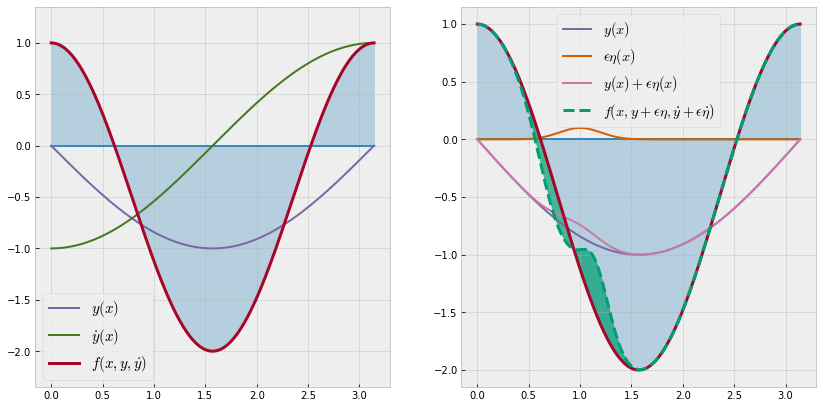

J[ y(x) ]            = -1.570798
J[ y(x)+eps*eta(x) ] = -1.526720


In [2]:
from scipy.integrate import simps

fig = plt.figure(figsize=(14,7))

x = np.linspace(0, np.pi, 200)
y = -np.sin(x)
y_dot = -np.cos(x)

def J(x, y, y_dot) :
    f = y_dot**2 + 2*y*np.sin(x)
    
    # integral f(x, y, y_dot)
    return simps(f, x)

sigma = 0.2
mu = 1.

def eta(x) :
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp( -((x-mu)**2)/(2*sigma**2) )

def eta_dot(x):
    return 1/(np.sqrt(2*np.pi)*sigma) * np.exp( -((x-mu)**2)/(2*sigma**2) ) * ( -(2*(x-mu))/(2*sigma**2)  )


ax1 = fig.add_subplot(1, 2, 1)

ax1.plot(x , np.zeros(x.shape[0]))
ax1.plot(x, y, label='$y(x)$', color=style_colors[2])
ax1.plot(x, y_dot, label='$\dot y(x)$', color=style_colors[3])
ax1.plot(x, y_dot**2 + 2*y*np.sin(x), label='$f(x, y, \dot y)$', lw=3, color=style_colors[1]) 
ax1.fill_between(x, np.zeros(x.shape[0]), y_dot**2 + 2*y*np.sin(x), alpha=0.3, color=style_colors[0]) 
ax1.legend(prop={'size': 15})
ax1.axis('equal')

eps = 0.05

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(x , np.zeros(x.shape[0]))
ax2.plot(x, y, label='$y(x)$', color=style_colors[2])
ax2.plot(x, eps*eta(x), label='$\epsilon \eta(x)$', color=style_colors[4])
ax2.plot(x, y+eps*eta(x), label='$y(x)+\epsilon \eta(x)$', color=style_colors[5])
ax2.plot(x, y_dot**2 + 2*y*np.sin(x), color=style_colors[1], lw=3) 
ax2.plot(x, (y_dot+eps*eta_dot(x))**2 + 2*(y+eps*eta(x))*np.sin(x), '--', lw=3,
         label='$f(x, y+\epsilon\eta, \dot y + \epsilon \dot \eta)$', color=style_colors[7])
ax2.fill_between(x, np.zeros(x.shape[0]), y_dot**2 + 2*y*np.sin(x), alpha=0.3, color=style_colors[0]) 
ax2.fill_between(x, y_dot**2 + 2*y*np.sin(x), (y_dot+eps*eta_dot(x))**2 + 2*(y+eps*eta(x))*np.sin(x), alpha=0.7, color=style_colors[7])

ax2.legend(prop={'size': 14.3})
ax1.axis('equal')

plt.show()

# numerical J[y]
print("J[ y(x) ]            = {:f}".format(J(x, y, y_dot)))
print("J[ y(x)+eps*eta(x) ] = {:f}".format(J(x, y+eps*eta(x), y_dot+eps*eta_dot(x))))

# exact J[y]
#print((3/4)*np.sin(2*np.pi) - (1/2)*np.pi)

위 그림을 그린 문제는 다음과 같다.

$$
J \left[y(x) \right] = \int_{0}^{\pi} \dot y^2 + 2y \sin(x) dx \quad \text{ with } y(0)=y(\pi) = 0
$$

위 문제에서 $J[y(x)]$를 위한 극점<sup>extrema</sup>를 찾기위해 오일러-라그랑지 방정식을 적용하면


$$
\begin{aligned}
& \frac{\partial \, (\dot y^2 + 2y \sin(x)) }{\partial \, y} - \frac{d}{dx} \left( \frac{\partial \, (\dot y^2 + 2y \sin(x)) }{\partial \, \dot y} \right) = 0 \\[10pt]
& 2 \sin(x) - 2 \ddot y = 0 \\[10pt]
& \ddot y(x) = \sin(x) \\[10pt]
& \int \ddot y(x) dx = \int \sin(x) dx \\[10pt]
& \dot y(x) = - \cos(x) + C_1 \\[10pt]
& \int \dot y(x)dx = \int - \cos(x) + C_1 dx \\[10pt]
& y(x) = - \sin(x) + C_1 x + C_2
\end{aligned}
$$

경계조건을 적용하면 구하고자 하는 $y(x)$는 다음과 같다.

$$
\begin{aligned}
& y(x) = - \sin(x) \\[10pt]
& \dot y(x) = -\cos(x)
\end{aligned}
$$

왼쪽 그래프에 $y(x)$, $\dot y(x)$와 이를 이용해서 $f(x, y, \dot y)$를 그려놓았다. $J \left[y(x) \right] $는 빨간색 그래프 아래 면적이므로 파란 영역의 면적이 된다. 

이제 $\epsilon \eta(x)$를 오른쪽 그래프의 주황색처럼 0.5~1.5사이에서 작은 값을 가지고 나머지 정의역에서는 거의 0이 되도록 정의하고 $y(x)$에 더해서 $y(x)$를 보라색 그래프에서 분홍색 그래프로 살짝 변화 시킨다. 그러면 $f(x, y, \dot y)$도 빨간색 그래프에서 녹색 점선 그래프로 변하게 되고 이에 따라 그래프 아래 면적 영역도 녹색 영역만큼 변하게 된다. 이 녹색 영역이 $\Delta J$가 된다. 이 녹색 영역은 모든 $x$ 위치에서 존재하는 순간의 면적변화량을 모두 적분하여 만든 것임을 알 수 있다. 모든 $x$ 위치에서 존재하는 면적 변화량에서 1계 미분에 의한 분량이  $\dfrac{ \delta J[y^*(x)]}{\delta y(x)} \epsilon \eta(x)$ 만큼 되는 것이다.

이상의 논의를 통해 범함수의 테일러 시리즈 전개를 알아보았고 이를 통해 범함수 $J[y(x)]$의 $y(x)$에 대한 미분<sup>functional derivative</sup>을 알아보기 위해 이 전개를 (\*\*\*)와 비교하면

$$
\begin{aligned}
J[y^*(x) + \epsilon \eta(x)] = J[y^*(x)]+ \underbrace{ \epsilon \int  \color{RoyalBlue}{\frac{ \delta J[y^*(x)]}{\delta y(x)}} \eta(x) \, dx+\frac{1}{2}\epsilon^2 \int \int \frac{\delta^2 J[y^*(x)]}{\delta y(x) \, \delta y(x^\prime)}  \eta(x) \,  \eta(x^\prime) \, dx dx^\prime + O(\epsilon^3) }_{\Delta J}\\[15pt]
\Delta J = \epsilon \int_{x_0}^{x_1} \eta \left\{ \color{RoyalBlue}{\frac{\partial \, f}{\partial \, y} -  \frac{d}{dx} \left( \frac{\partial \, f}{\partial \, \dot y} \right)} \right\} dx + \epsilon^2 \color{OrangeRed}{ V_2} + O(\epsilon^3)
\end{aligned}
$$

$J[y(x)]$의 $y(x)$에 대한 미분은

$$
\frac{ \delta J[y]}{\delta y} = \frac{\partial \, f}{\partial \, y} -  \frac{d}{dx} \left( \frac{\partial \, f}{\partial \, \dot y} \right)
$$

이 됨을 알 수 있다. 결과적으로 1계 필요조건의 의미가 함수최적화와 마찬가지로 "최적화하고자 하는 목적함수의 1계미분이 0이 되는" 것임을 알 수 있다.

### 참고문헌

1. Optimal Control and the Calculus of Variations, Enid R. Pinch, Oxford University Press, 1995)

2. Pattern Recognition and Machine Learning, Christopher M. Bishop, Springer, 2006


### 관련 블로그

https://metamath1.github.io


In [3]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<!--https://github.com/Joungkyun/font-d2coding-->
<link href="http://cdn.jsdelivr.net/gh/joungkyun/font-d2coding/d2coding.css" rel="stylesheet" type="text/css">
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown):not(.p-TabBar-tab):not(.p-MenuBar-item):not(.jp-DirListing-item):not(.p-CommandPalette-header):not(.p-CommandPalette-item):not(.jp-RunningSessions-item)
            { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }           
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important; line-height: 130% !important;}
    .code-body { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #FF0000; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>